# <center>Homework 6 - Learning XOR Function Using a Two-Layer Neural Network</center>

### Submission:
 * Submit this notebook file and the pdf version.
 * Deadline: 11:59 pm, 10/22

### Assignment:

In this assignment, you will work with a `2-layer neural network` to train a model capable of learning the XOR function. The neural network comes with initial weights, and you will perform the following tasks:
 * Calculate the parameters for both forward and back propagation to validate your manual calculations.
 * Implement gradient descent using NumPy to find the optimal weights and biases for each layer.

### Two-Layer Neural Network
<img src="2-layer NN.png" alt="Drawing" style="width: 500px;"/>

### Truth Table and Scatter Plot of XOR Function 


<table><tr>
<td> <img src="XOR_truthtable.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="XOR.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

### Import Tools

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

### Activation Function Library

In [168]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [169]:
def dsigmoid(z):
    '''
    derivative of sigmoid function
    '''
    a = sigmoid(z)
    return a * (1 - a)

In [170]:
def relu(z):
    return np.maximum(z, 0)

In [171]:
def drelu(z):
    '''
    derivative of ReLU function
    '''
    return np.where(z < 0, 0, 1)

In [172]:
def dtanh(z):
    '''
    derivative of tanh function
    '''
    a = np.tanh(z)
    return 1 - a**2

### Neural Network Parameters

In [173]:
n = 2   # number of input features
m = 4   # number of samples
n1 = 2  # number of neurons in the hidden layer
n2 = 1  # number of neurons in the output layer

## 1. Forward Propagation

### 1.1 Forward Propagation Matrices

### Write down sample matrix, $X$, and target vector, $Y$.

In [174]:
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
])

Y = np.array([
    [0, 1, 1, 0]
])

### Write down weight matrix, $W^{[1]}$, and the bias vector, $b^{[1]}$ for the hidden layer.

In [175]:
W1 = np.array([
    [3, 2],
    [4, 5]
])

b1 = np.array([[-1], [-2]])

### Write down weight matrix, $W^{[2]}$, and the bias vector, $b^{[2]}$ for the output layer.

In [176]:
W2 = np.array([
    [7, -6]
])

b2 = np.array([
    [-3]
])

### 1.2 Weighted Sum and Activation Output for Each Neuron

### Calculate $Z^{[1]}$ and $A^{[1]}$ for the hidden layer. The activation function is Sigmoid.

In [177]:
Z1 = np.dot(W1, X) + b1
A1 = sigmoid(Z1)

print(f'Z1 = {Z1}\nA1 = {A1}')


Z1 = [[-1  1  2  4]
 [-2  3  2  7]]
A1 = [[0.26894142 0.73105858 0.88079708 0.98201379]
 [0.11920292 0.95257413 0.88079708 0.99908895]]


### Calculate $Z^{[2]}$ and $A^{[2]}$ for the output layer. The activation function is Sigmoid.

In [178]:
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

print(f'Z2 = {Z2}\nA2 = {A2}')

Z2 = [[-1.83262758 -3.59803471 -2.11920292 -2.12043716]]
A2 = [[0.13792555 0.02664792 0.10724436 0.10712625]]


### Based on the values of $A^{[2]}$, what are the predicted target values, $\hat{Y}=\{\hat{y}^{(1)}, \hat{y}^{(2)},\hat{y}^{(3)}, \hat{y}^{(4)} \}$?

In [179]:
Y_hat = np.round(A2)
print(Y_hat)

[[0. 0. 0. 0.]]


### 1.3 Calculate the cost function, $J(W, b)$.

In [180]:
J = -(1/m) * (np.dot(Y, (np.log(A2)).transpose()) + np.dot((1-Y), np.log(1-A2).transpose()))
J

array([[1.52985329]])

## 2. Back Propagation (One Iteration)

### Calculate $dZ^{[2]}, dW^{[2]}, db^{[2]}$ for the output layer. Please print your answers.

In [181]:
dZ2 = A2 - Y

dW2 = (1/m)*(np.dot(dZ2, A1.transpose()))

db2 = (1/m)*(np.sum(dZ2, axis=1, keepdims=True))

print(f'dZ2 = {dZ2}\ndW2 = {dW2}\ndb2 = {db2}')

dZ2 = [[ 0.13792555 -0.97335208 -0.89275564  0.10712625]]
dW2 = [[-0.33890515 -0.3975142 ]]
db2 = [[-0.40526398]]


### Calculate $dZ^{[1]}, dW^{[1]}, db^{[1]}$ for the hidden layer. Remember the activation function is sigmoid. Please print your results.

In [182]:
dZ1 = np.dot(W2.transpose(), dZ2) * dsigmoid(Z1)

dW1 = (1/m) * np.dot(dZ1, X.transpose())

db1 = (1/m)*(np.sum(dZ1, axis=1, keepdims=True))

print(f'dZ1 = {dZ1}\ndW1 = {dW1}\ndb1 = {db1}')


dZ1 = [[ 1.89824664e-01 -1.33960844e+00 -6.56135308e-01  1.32449762e-02]
 [-8.68877886e-02  2.63836774e-01  5.62401692e-01 -5.85051483e-04]]
dW1 = [[-0.16072258 -0.33159087]
 [ 0.14045416  0.06581293]]
db1 = [[-0.44816853]
 [ 0.18469141]]


## 3. Run Gradient Descent to Find Optimum Weights

In this section, you will write NumPy codes to implement equations for forward and back propagation to compute the gradient descent algorithm and find the optimum weight. 

__You will run two cases: one with Sigmoid activation and one with tanh activation, both in the hidden layer.__

### Case 1: Sigmoid activation for the hidden layer

### Set up hyperparameters

- <font color='maroon'>Learning Rate: Experiment with different values of the learning rate. Start with a small value (e.g., 0.05) and gradually increase or decrease.
- Number of Iterations: Vary the number of iterations (epochs) for training. Begin with a moderate number (e.g., 1000) and adjust accordingly. 
- Random Initialization: Avoid initializing weights to zero. Randomize the initial values to prevent symmetries during training.</font>

In [183]:
alpha = 0.5  # learning rate
epoch = 30000        # number of iteration

## random initialization of weights and biases
W1 = np.random.randn(n1, n)
b1 = np.zeros((n1, 1))
W2 = np.random.randn(n2, n1)
b2 = np.zeros((n2, 1))

### Save the initial random weights for Case 2.

In [184]:
W1_i, b1_i, W2_i, b2_i = W1, b1, W2, b2

### Run Gradient Descent

<font color='maroon'> For each epoch, you will execute the following:
* Forward propagation
* Calculate the cost function, $J(W,b)$, and store it in an array
* Backward propagation
* Update the weights for each layer
</font>

In [185]:
J_history = []     # Initialize an array to save the cost

for i in range(epoch):

    # Forward progagation. Write your code.
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)    
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Calculate and save the cost. Write your code.
    
    J = -(1/m) * (np.dot(Y, (np.log(A2)).transpose()) + np.dot((1-Y), np.log(1-A2).transpose()))
    J_history.append(J[0][0])
    
    # Back progagation. Write your code.
    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2, A1.transpose()))
    db2 = (1/m)*(np.sum(dZ2, axis=1, keepdims=True))
    
    dZ1 = np.dot(W2.transpose(), dZ2) * dsigmoid(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.transpose())
    db1 = (1/m)*(np.sum(dZ1, axis=1, keepdims=True))
    
    # Update weights and biases. Write your code
    W1 -= alpha * dW1
    b1 -= alpha * db1

    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    

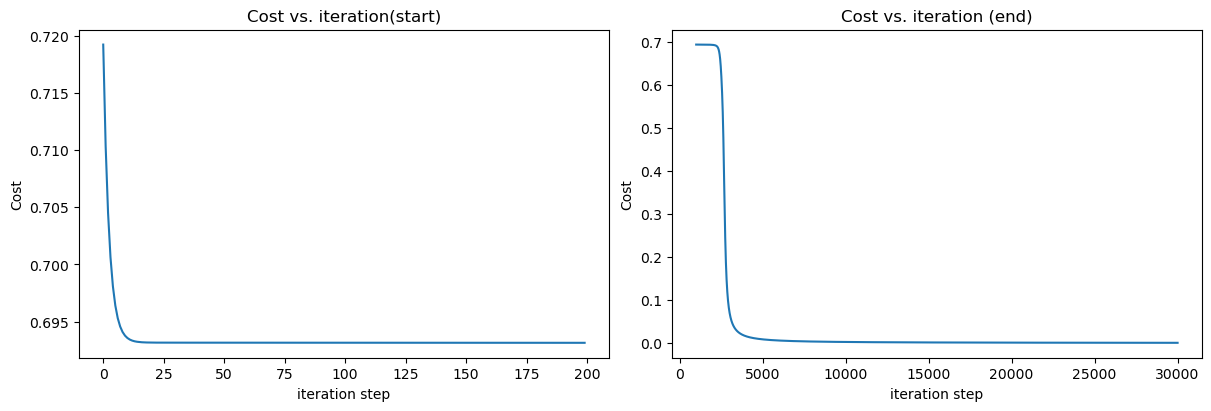

In [186]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:200])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


### Print the final cost, $A^{[2]}$, and $\hat{Y}$ (the predicted target values based on $A^{[2]}$)
#### <font color='maroon'>Is $\hat{Y}$ close to $\{0, 1, 1, 0\}$?</font> 

The result is 100% correct, and the cost is also close to 0.

In [187]:
print(f'Final cost = {J_history[-1]:.06F}')

print(f'A[2] = {A2}')

print(f'Predicted output = {np.round(A2)}')

Final cost = 0.000680
A[2] = [[7.95390485e-04 9.99391478e-01 9.99391305e-01 7.05946496e-04]]
Predicted output = [[0. 1. 1. 0.]]


### Print the optimum weights.

In [188]:
print ("W1 =", W1) 
print ("b1 =", b1)
print ("W2 =", W2)
print ("b2 =", b2)

W1 = [[ 7.4980067  -7.78723617]
 [-7.94291071  7.69075269]]
b1 = [[-4.04229642]
 [-4.14852629]]
W2 = [[15.5229293 15.4838294]]
b2 = [[-7.64440845]]


### Question:<font color='maroon'> Do you notice some interesting patterns in $W^{[1]}$ and $W^{[2]}$?</font> 

Both W1 and W2 have very similar values in their rows. W1's absolute values are close, whereas for W2, the entries in the same row are almost the same.

### Case 2: tanh activation for the hidden layer

### Set up hyperparameters

#### <font color='maroon'>Use the same learning rate, epoch, and initial weights as you did in Case 1.</font>

In [189]:
W1, b1, W2, b2 = W1_i, b1_i, W2_i, b2_i      # Retrieve the initial weights and biases

In [190]:
alpha = 0.5   # learning rate
epoch = 30000  # number of iterations

### Run Gradient Descent

<font color='maroon'> Remember to change the activation function, both in forward and back propagation, to tanh.
</font>

In [191]:
J1_history = []      # Initialize an array to save the cost

for i in range(epoch):

    # Forward progagation. Write your code.
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)    
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    
    # Calculate and save the cost. Write your code.
    J = -(1/m) * (np.dot(Y, (np.log(A2)).transpose()) + np.dot((1-Y), np.log(1-A2).transpose()))
    J1_history.append(J[0][0])
           
    
    # Back progagation. Write your code.
    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2, A1.transpose()))
    db2 = (1/m)*(np.sum(dZ2, axis=1, keepdims=True))
    
    dZ1 = np.dot(W2.transpose(), dZ2) * dtanh(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.transpose())
    db1 = (1/m)*(np.sum(dZ1, axis=1, keepdims=True))
    
    # Update weights and biases. Write your code
    W1 -= alpha * dW1
    b1 -= alpha * db1

    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    

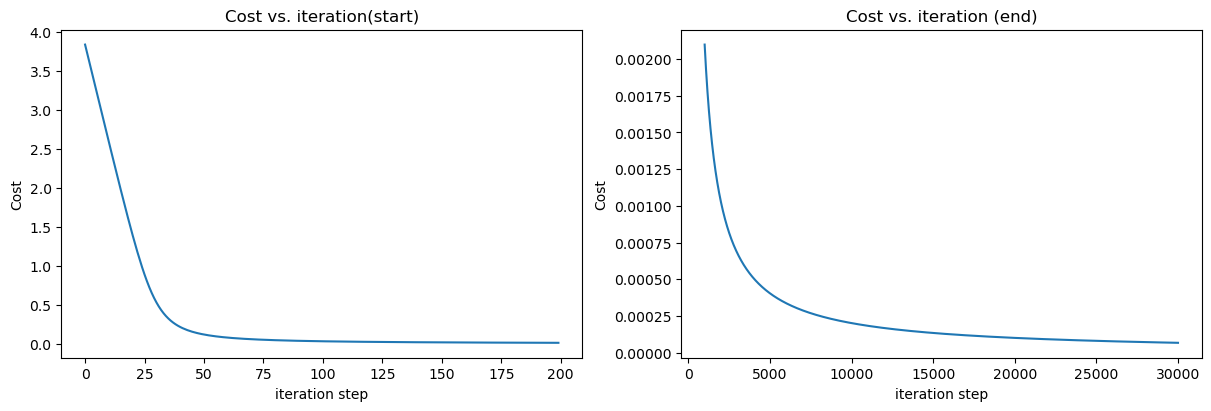

In [192]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J1_history[:200])
ax2.plot(1000 + np.arange(len(J1_history[1000:])), J1_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


### Print the final cost, $A^{[2]}$, and $\hat{Y}$ (the predicted target values based on $A^{[2]}$)
#### <font color='maroon'>Is $\hat{Y}$ close to $\{0, 1, 1, 0\}$?</font> 

The predicted output is 100% correct. It is because of the low cost.

In [193]:
print(f'Final cost = {J1_history[-1]:.06F}')

print(f'A[2] = {A2}')

print(f'Predicted output = {np.round(A2)}')

Final cost = 0.000067
A[2] = [[2.70860439e-10 9.99866460e-01 9.99866461e-01 2.70762400e-10]]
Predicted output = [[0. 1. 1. 0.]]


### Print the optimum weights.

In [194]:
print ("W1 =", W1) 
print ("b1 =", b1)
print ("W2 =", W2)
print ("b2 =", b2)

W1 = [[ 7.77715748 -7.78723615]
 [-7.9429107   7.94176458]]
b1 = [[-3.76314562]
 [-3.8975144 ]]
W2 = [[15.49497384 15.49467492]]
b2 = [[8.93082302]]


### If you successfully save the costs for both cases ($J$ and $J1$), use the following code to plot cost vs. iteration and make a comparison. 

### Compare the cost function convergence between the two cases.

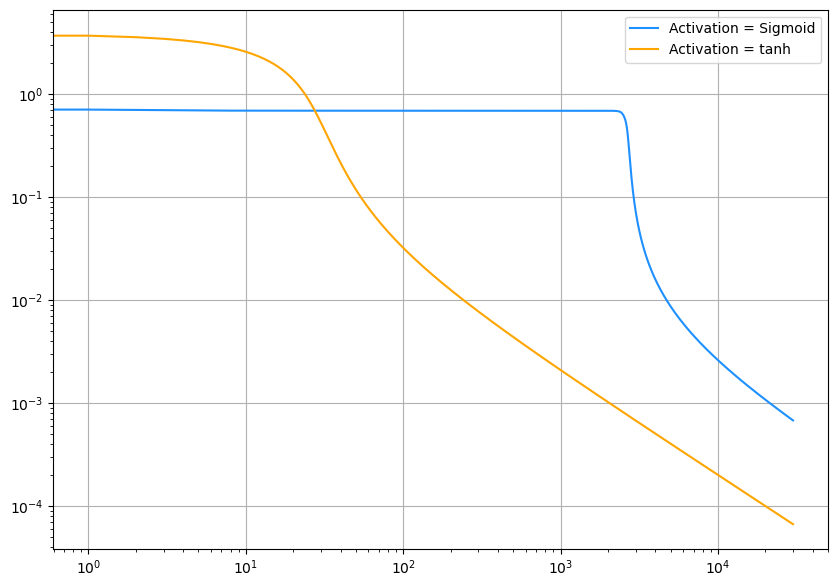

In [195]:
plt.figure(figsize=(10,7))
plt.plot(J_history, color='DodgerBlue', label='Activation = Sigmoid')
plt.plot(J1_history, color='orange', label='Activation = tanh')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

### Question:<font color='maroon'> What is your observation? </font>

The sigmoid function had a constant cost till around 3000 iterations, and then the cost starts to decrease. For tanh, however, the cost starts to decrease after the first few epochs. tanh's cost is decreasing linearly, whereas, for sigmoid, the cost is decreasing exponentially.